In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
pd.set_option('display.max_columns', None)

print(tf.__version__)

%run biosignal_and_tetris_result_service.ipynb

2.2.0


In [2]:
results = get_player_results()

In [3]:
for key, value in results.items():
    print (key)

E03_R02_S01
E03_R02_S02
E03_R02_S03


In [4]:
df = results['E03_R02_S01'][0]['p1']

In [5]:
df

,Czas,A: BVP1,C: EMG1,E: Skin Cond,F: Temp1,G: Abd Resp,Draw,Lose,Win
512,2.000000,36.342,23.707,5.151,32.185,12.010,1,0,0
513,2.003906,36.313,21.687,5.151,32.185,12.005,1,0,0
514,2.007812,36.283,19.667,5.150,32.185,12.000,1,0,0
515,2.011719,36.252,19.356,5.150,32.185,11.995,1,0,0
516,2.015625,36.219,20.651,5.149,32.185,11.991,1,0,0
...,...,...,...,...,...,...,...,...,...
16379,63.980469,39.719,9.931,5.984,31.911,13.265,0,1,0
16380,63.984375,39.700,10.656,5.984,31.911,13.266,0,1,0
16381,63.988281,39.671,13.659,5.984,31.911,13.267,0,1,0
16382,63.992188,39.633,16.715,5.984,31.911,13.268,0,1,0


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop(['Czas','Draw','Lose','Win'],axis=1).values

In [8]:
y = df['Lose'].values

<AxesSubplot:xlabel='Lose', ylabel='count'>

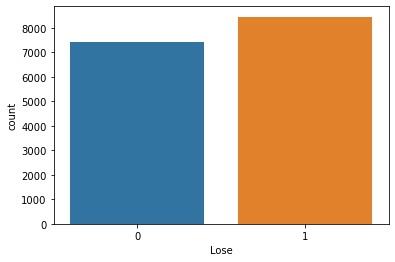

In [9]:
sns.countplot(x='Lose',data=df)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [14]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(5,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='relu'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [15]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=250,
          batch_size=512,
          validation_data=(X_test, y_test),
         )

Epoch 1/250
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/22 [>.............................] - ETA: 0s - loss: 3.2074WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f8d5e733560> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Caus

22/22 [==============================] - 0s 2ms/step - loss: 0.5911 - val_loss: 0.5065
Epoch 65/250
22/22 [==============================] - 0s 2ms/step - loss: 0.5843 - val_loss: 0.5041
Epoch 66/250
22/22 [==============================] - 0s 2ms/step - loss: 0.5772 - val_loss: 0.4981
Epoch 67/250
22/22 [==============================] - 0s 2ms/step - loss: 0.5856 - val_loss: 0.4898
Epoch 68/250
22/22 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.4930
Epoch 69/250
22/22 [==============================] - 0s 2ms/step - loss: 0.5665 - val_loss: 0.4824
Epoch 70/250
22/22 [==============================] - 0s 3ms/step - loss: 0.5711 - val_loss: 0.4794
Epoch 71/250
22/22 [==============================] - 0s 3ms/step - loss: 0.5580 - val_loss: 0.4759
Epoch 72/250
22/22 [==============================] - 0s 4ms/step - loss: 0.5559 - val_loss: 0.4646
Epoch 73/250
22/22 [==============================] - 0s 3ms/step - loss: 0.5594 - val_loss: 0.4688
Epoch 74/250


22/22 [==============================] - 0s 4ms/step - loss: 0.4816 - val_loss: 0.4252
Epoch 146/250
22/22 [==============================] - 0s 7ms/step - loss: 0.4965 - val_loss: 0.4452
Epoch 147/250
22/22 [==============================] - 0s 3ms/step - loss: 0.5037 - val_loss: 0.4399
Epoch 148/250
22/22 [==============================] - 0s 3ms/step - loss: 0.5036 - val_loss: 0.4351
Epoch 149/250
22/22 [==============================] - 0s 3ms/step - loss: 0.4987 - val_loss: 0.4364
Epoch 150/250
22/22 [==============================] - 0s 2ms/step - loss: 0.4954 - val_loss: 0.4355
Epoch 151/250
22/22 [==============================] - 0s 2ms/step - loss: 0.4971 - val_loss: 0.4339
Epoch 152/250
22/22 [==============================] - 0s 2ms/step - loss: 0.4951 - val_loss: 0.4326
Epoch 153/250
22/22 [==============================] - 0s 3ms/step - loss: 0.4906 - val_loss: 0.4318
Epoch 154/250
22/22 [==============================] - 0s 3ms/step - loss: 0.4914 - val_loss: 0.4296
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 0.4621 - val_loss: 0.4167
Epoch 227/250
22/22 [==============================] - 0s 3ms/step - loss: 0.4633 - val_loss: 0.4163
Epoch 228/250
22/22 [==============================] - 0s 3ms/step - loss: 0.4626 - val_loss: 0.4155
Epoch 229/250
22/22 [==============================] - 0s 3ms/step - loss: 0.4605 - val_loss: 0.4154
Epoch 230/250
22/22 [==============================] - 0s 3ms/step - loss: 0.4677 - val_loss: 0.4167
Epoch 231/250
22/22 [==============================] - 0s 3ms/step - loss: 0.4669 - val_loss: 0.4175
Epoch 232/250
22/22 [==============================] - 0s 6ms/step - loss: 0.4653 - val_loss: 0.4177
Epoch 233/250
22/22 [==============================] - 0s 4ms/step - loss: 0.4710 - val_loss: 0.4154
Epoch 234/250
22/22 [==============================] - 0s 3ms/step - loss: 0.4659 - val_loss: 0.4162
Epoch 235/250
22/22 [==============================] - 0s 3ms/step - loss: 0.4640 - val_loss: 0.4163
Epoc

In [16]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

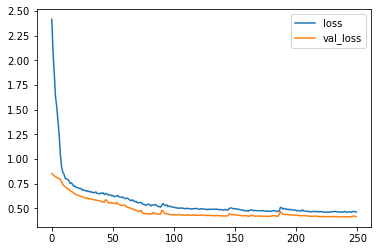

In [17]:
losses[['loss','val_loss']].plot()

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81      2292
           1       0.96      0.61      0.75      2470

    accuracy                           0.79      4762
   macro avg       0.83      0.79      0.78      4762
weighted avg       0.83      0.79      0.78      4762



In [21]:
confusion_matrix(y_test,predictions)

array([[2226,   66],
       [ 956, 1514]])